<a href="https://www.kaggle.com/code/shubhamgupta012/linkedin-job-analysis?scriptVersionId=137999181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-job-data/linkdin_Job_data.xlsx
/kaggle/input/linkedin-job-data/linkdin_Job_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/linkedin-job-data/linkdin_Job_data.csv')
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


In [3]:
df.shape

(7927, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

In [5]:
df.describe()

,job_ID,company_id,Column1
count,7.927000e+03,0.0,0.0
mean,3.466724e+09,NaN,NaN
std,5.778011e+07,NaN,NaN
min,1.419216e+08,NaN,NaN
25%,3.467367e+09,NaN,NaN
50%,3.471882e+09,NaN,NaN
75%,3.476181e+09,NaN,NaN
max,3.477823e+09,NaN,NaN


In [6]:
df.dtypes

job_ID                  int64
job                    object
location               object
company_id            float64
company_name           object
work_type              object
full_time_remote       object
no_of_employ           object
no_of_application      object
posted_day_ago         object
alumni                 object
Hiring_person          object
linkedin_followers     object
hiring_person_link     object
job_details            object
Column1               float64
dtype: object

In [7]:
df.isnull().sum()

job_ID                   0
job                     33
location                33
company_id            7927
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
Column1               7927
dtype: int64

In [8]:
df.drop(['company_id','Column1'],axis=1,inplace=True)

In [9]:
df.drop(['hiring_person_link'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

job_ID                   0
job                     33
location                33
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
job_details             46
dtype: int64

In [11]:
df.head(20)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,About the job The ideal candidate will use the...
5,3472504479,Data Analyst,"Gurugram, Haryana, India",airtel,On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200,10 hours,132 company alumni,NaN,"972,657 followers",About the job The ideal candidate will use the...
6,3471658510,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Bengaluru, Karnataka, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,546 followers",About the job Crossover is the world's #1 sour...
7,3472808738,Shopify Developer,"Delhi, India",Digital Impressions,On-site,Full-time,51-200 employees,2,7 hours,1 company alumni,Rashmi Aggarwal,"1,045 followers",About the job The ideal candidate will be resp...
8,3475061559,Database Developer,"Gurugram, Haryana, India",Kline & Company,Hybrid,Full-time,201-500 employees,7,25 minutes,NaN,Duncan Lawie,"30,319 followers",About the job Are you an experienced Microsoft...
9,3473336242,Shopify Developer,"Gurugram, Haryana, India",ADesignGuy,Hybrid,NaN,NaN,minutes,9 minutes,NaN,NaN,"2,163 followers",About the job Job Title: Shopify Developer (In...


# Value Counts

In [12]:
df['job'].value_counts()

Lead Java Software Engineer       172
Data Engineer                     153
Senior Automation Tester          146
Business Analyst                  126
Lead Java Developer               120
                                 ... 
Financial Systems Manager           1
Google Analytics Manager            1
OIM Developer                       1
Full Stack Developers               1
Power train function developer      1
Name: job, Length: 2991, dtype: int64

In [13]:
df['location'].value_counts()

Bengaluru, Karnataka, India         1324
India                                829
Hyderabad, Telangana, India          671
Chennai, Tamil Nadu, India           477
Gurugram, Haryana, India             476
                                    ... 
Udaipur, Rajasthan, India              1
Greater Nagpur Area                    1
Thiruvarur, Tamil Nadu, India          1
Bandra, Maharashtra, India             1
Sriperumbudur, Tamil Nadu, India       1
Name: location, Length: 151, dtype: int64

In [14]:
df['company_name'].value_counts()

EPAM Anywhere                  1517
Tata Consultancy Services       378
Uplers                          295
Crossover                       133
Virtusa                          89
                               ... 
UnikHire                          1
Technomine                        1
Olive Web Solutions Pvt Ltd       1
ARInspect                         1
Akkodis                           1
Name: company_name, Length: 2495, dtype: int64

In [15]:
df['work_type'].value_counts()

On-site    3258
Remote     2999
Hybrid     1479
Name: work_type, dtype: int64

In [16]:
df['full_time_remote'].value_counts()

Full-time · Mid-Senior level    3802
Full-time                       2679
Full-time · Associate            584
Full-time · Entry level          177
Internship                       144
Contract · Mid-Senior level      132
Contract                         123
Full-time · Executive             49
Part-time                         48
Contract · Associate              32
Full-time · Director              31
Contract · Entry level            19
Internship · Internship            5
Full-time · Internship             5
Part-time · Mid-Senior level       3
Temporary                          3
Volunteer                          3
11-50 employees                    2
Associate                          2
Internship · Entry level           2
1-10 employees                     1
Part-time · Associate              1
Contract · Executive               1
Name: full_time_remote, dtype: int64

In [17]:
df['no_of_application'].value_counts()

hours    2635
days      786
200       489
day       328
hour      250
         ... 
180         1
155         1
165         1
169         1
157         1
Name: no_of_application, Length: 202, dtype: int64

In [18]:
df['alumni'].value_counts()

3 company alumni         1804
1 company alumni          609
2 company alumni          421
10,080 company alumni     235
12 company alumni         145
                         ... 
828 company alumni          1
668 company alumni          1
28,799 company alumni       1
488 company alumni          1
126 company alumni          1
Name: alumni, Length: 191, dtype: int64

In [19]:
df['Hiring_person'].value_counts()

Ekaterina Costyshko     266
Tatsiana Sadovskaya     220
Anastasiya Volkova      183
Aliaksandra Shauchuk    113
Shahid Ahmad             53
                       ... 
Debasmita Shaw, PhD       1
Shiwangi Sharma           1
Amresh Kumar              1
Sumanau Sareen            1
Poornima Viswanathan      1
Name: Hiring_person, Length: 2823, dtype: int64

In [20]:
df.head()

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,About the job The ideal candidate will use the...


In [21]:
# df["linkedin_followers"] = df["linkedin_followers"].str.replace(",", "").str.extract(r"(\d+)", expand=False).astype(int)
df["linkedin_followers"] = df["linkedin_followers"].str.replace(",", "").str.extract(r"(\d+)", expand=False).fillna(-1).astype(int)
df["posted_day_ago"] = df["posted_day_ago"].str.replace(",", "").str.extract(r"(\d+)", expand=False).fillna(-1).astype(int)
df["alumni"] = df["alumni"].str.replace(",", "").str.extract(r"(\d+)", expand=False).fillna(-1).astype(int)


In [22]:
# df['no_of_application'] = df['no_of_application'].astype(int)

In [23]:
df['alumni'].value_counts()

-1        3069
 3        1804
 1         609
 2         421
 10080     235
          ... 
 828         1
 668         1
 28799       1
 488         1
 126         1
Name: alumni, Length: 192, dtype: int64

In [24]:
df['linkedin_followers'].value_counts()

-1          3147
 449483       17
 449493       16
 449491       13
 449572       10
            ... 
 147981        1
 20169         1
 11175         1
 4228          1
 1421090       1
Name: linkedin_followers, Length: 3914, dtype: int64

In [25]:
df['posted_day_ago'].value_counts()

 1     1183
 2     1060
 6      575
 3      518
 10     442
 5      433
 11     415
 9      357
 4      294
 14     265
 13     261
 8      253
 15     239
 16     232
 12     231
 17     205
 7      201
 18     143
 19     120
 20      83
 22      75
 21      69
 23      55
 56      14
 32      13
 52      11
 43      10
 53      10
 26       9
 46       9
 37       9
 57       9
 24       8
 45       8
 29       7
 27       7
-1        7
 33       6
 41       6
 38       6
 34       5
 54       5
 51       5
 49       5
 25       5
 50       5
 28       5
 39       5
 58       4
 35       3
 47       3
 55       3
 42       3
 59       3
 31       3
 44       2
 40       2
 36       1
 30       1
 48       1
Name: posted_day_ago, dtype: int64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df.head()

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8,12,NaN,5395547,About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8,12,NaN,5395547,About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9,3,Shahid Ahmad,-1,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200,7,-1,Vartika Singh,2094,About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26,1,Manisha (Gisele Smith),-1,About the job The ideal candidate will use the...


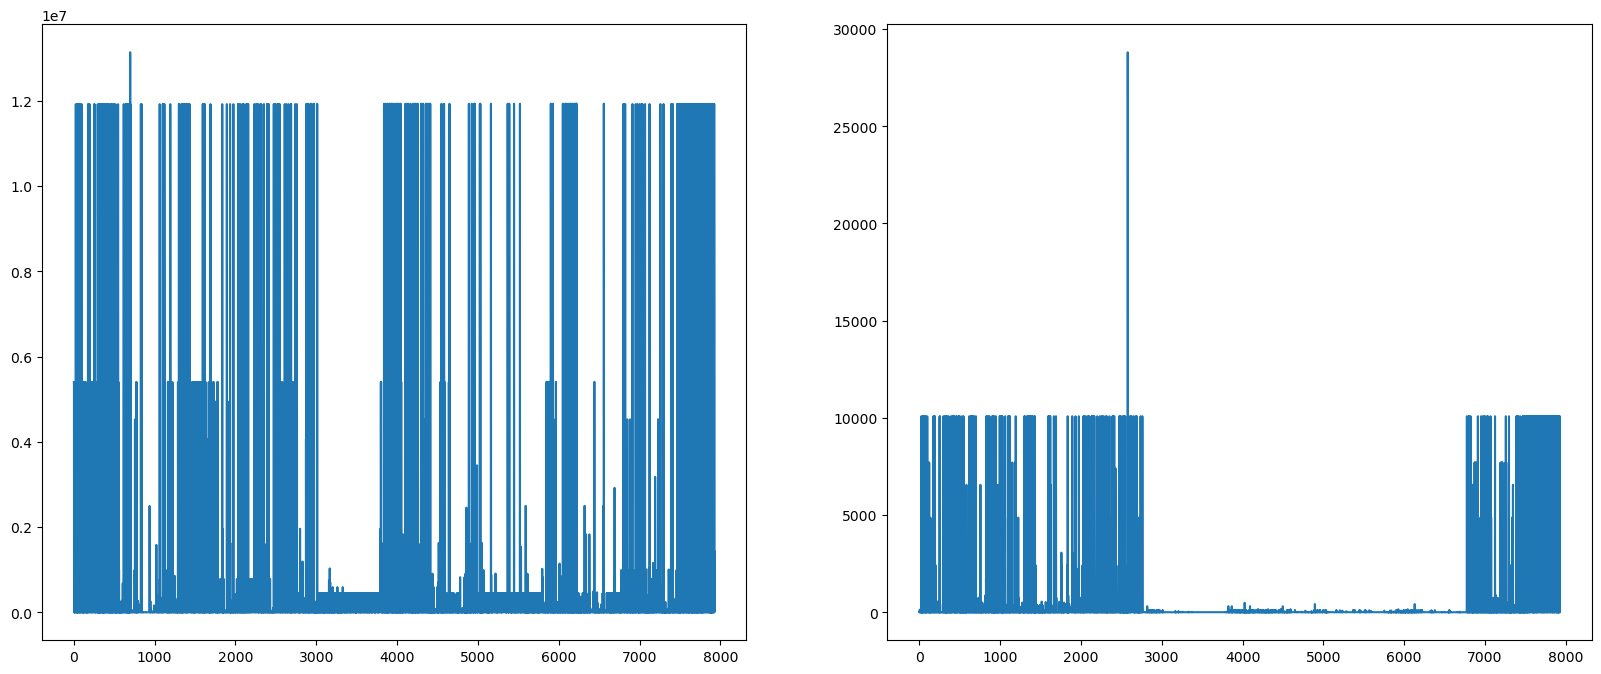

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(df.index,df['linkedin_followers'])
plt.subplot(1,2,2)
plt.plot(df.index,df['alumni'])


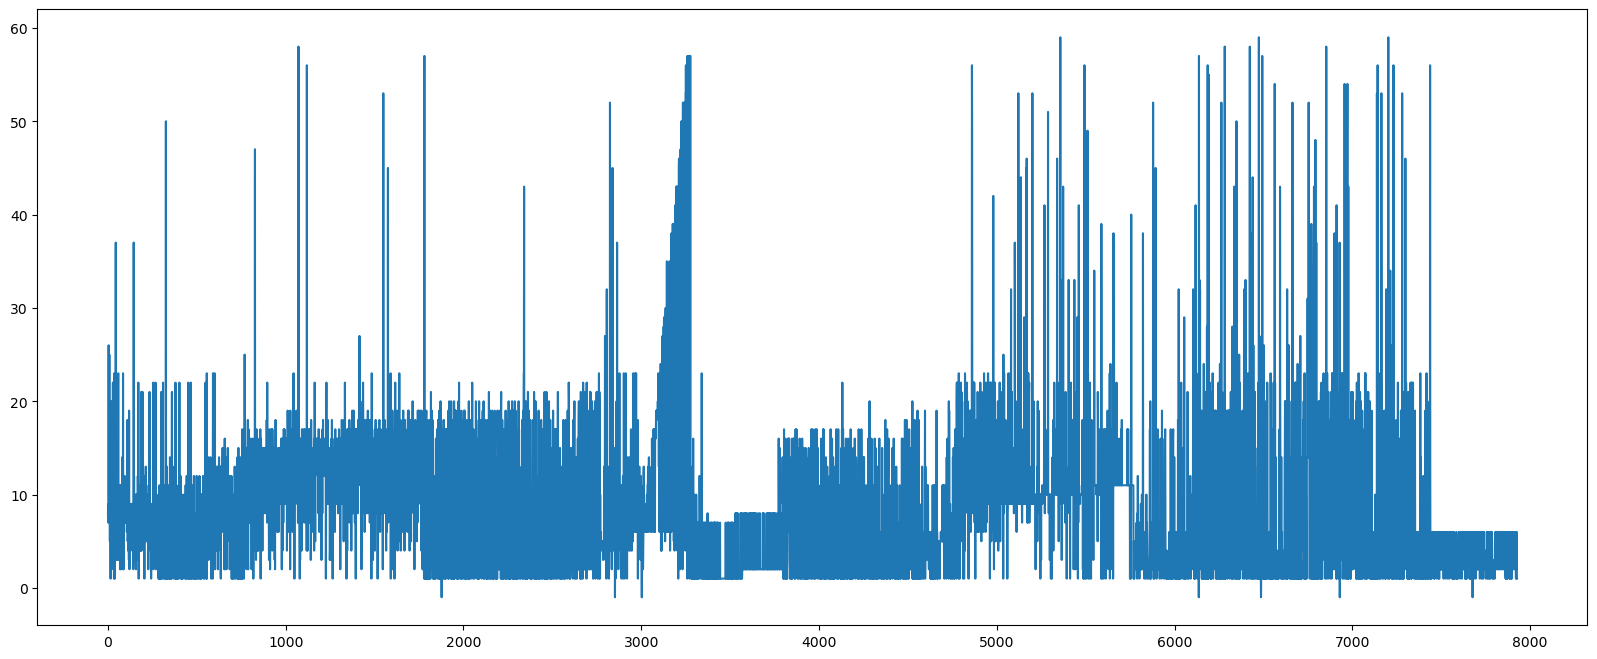

In [29]:
plt.figure(figsize=(20,8))
plt.plot(df.index,df['posted_day_ago'])


<Axes: >

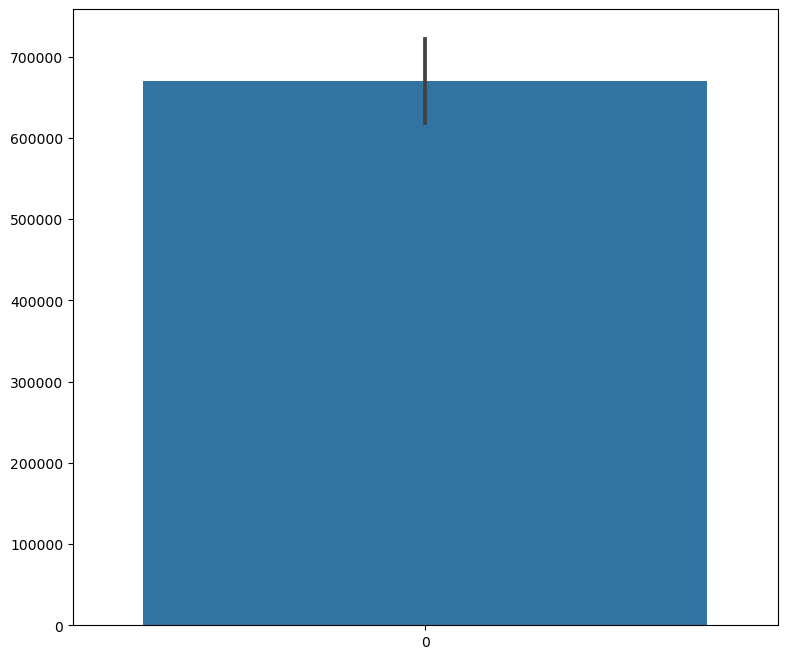

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(df['linkedin_followers'])


In [31]:
print("Y")

Y
